**Steps**

In this guide, we will follow the following steps:

Step 1 - Loading the required libraries and modules.

Step 2 - Reading the data and performing basic data checks.

Step 3 - Creating arrays for the features and the response variable.

Step 4 - Creating the training and test datasets.

Step 5 - Building , predicting, and evaluating the neural network model.

Step 1 - Loading the Required Libraries

In [1]:
# Importing Basic Libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import sklearn
from sklearn import tree

**Step 2 - Reading the Dataset and Performing Basic Data Checks**

In [2]:
# Reading Train Dataset from Local Drive
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [3]:
CarEval = pd.read_csv("car.csv") 

In [4]:
print("Shape of the Data: ", CarEval.shape)

Shape of the Data:  (1728, 7)


In [5]:
CarEval.head()
#CarEval.sample(5)
#CarEval.tail()

,buying,maint,doors,persons,lug_boot,safety,CAR
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,high,5more,more,big,med,unacc
2,med,low,4,4,med,low,unacc
3,low,vhigh,2,2,big,med,unacc
4,low,high,5more,4,big,low,unacc


In [6]:
CarEval.info()
#CarEval.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   CAR       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
CarEval.describe()
#CarEval.describe().transpose()

,buying,maint,doors,persons,lug_boot,safety,CAR
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,4,4,med,med,unacc
freq,432,432,432,576,576,576,1210


In [8]:
#CarEval.isnull().sum()
CarEval.isnull().any()


buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
CAR         False
dtype: bool

In [9]:
CarEval.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
CAR         4
dtype: int64

In [10]:
list(CarEval)
#CarEval.columns


['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'CAR']

**Comparative Data Analysis**

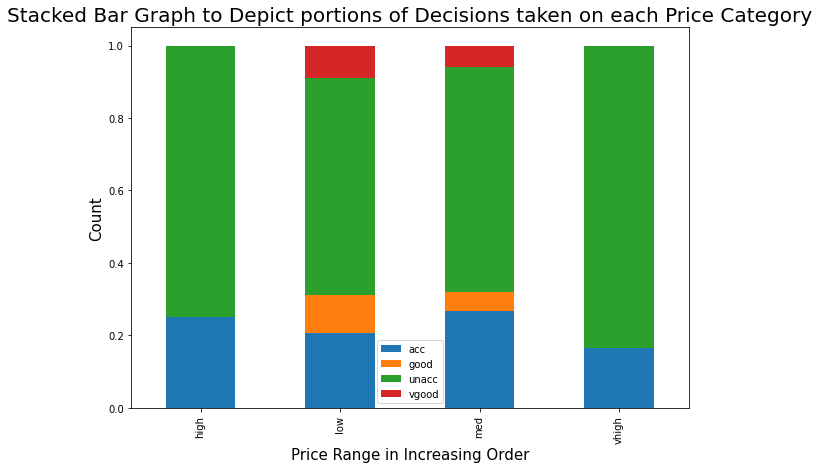

In [11]:
buying = pd.crosstab(CarEval['buying'], CarEval['CAR'])
buying.div(buying.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Price Category', fontsize = 20)
plt.xlabel('Price Range in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

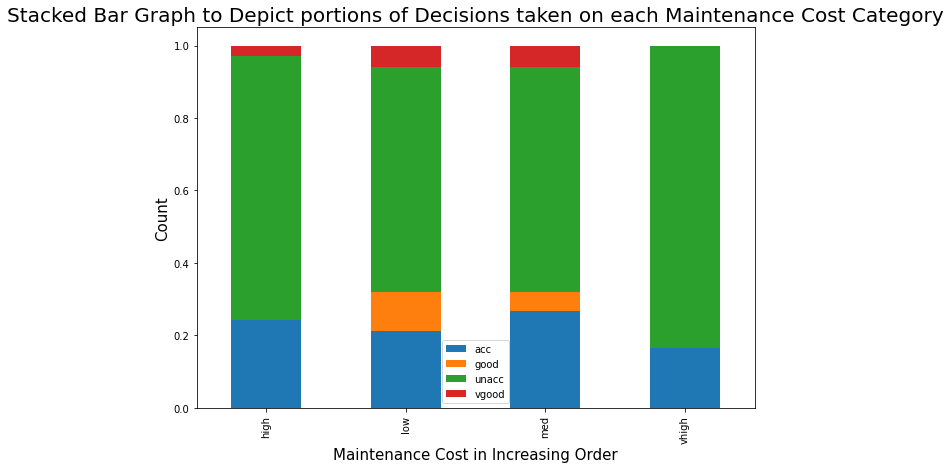

In [12]:
maint = pd.crosstab(CarEval['maint'], CarEval['CAR'])
maint.div(maint.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Maintenance Cost Category', fontsize = 20)
plt.xlabel('Maintenance Cost in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

In [13]:
safety = pd.crosstab(data['safety'], data['Decision'])
safety.div(safety.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Safety Category', fontsize = 20)
plt.xlabel('Safety Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()



doors = pd.crosstab(data['Number of Doors'], data['Decision'])
doors.div(doors.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each doors Category', fontsize = 20)
plt.xlabel('No. of Doors in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()



capacity = pd.crosstab(data['Capacity'], data['Decision'])
capacity.div(capacity.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each capacity Category', fontsize = 20)
plt.xlabel('Capacity in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()


luggage = pd.crosstab(data['Size of Luggage Boot'], data['Decision'])
luggage.div(safety.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each luggage size Category', fontsize = 20)
plt.xlabel('Luggage Size in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()


NameError: ignored

**Univariate Data Analysis**

In [14]:
CarEval['CAR'].value_counts().sort_index()


acc       384
good       69
unacc    1210
vgood      65
Name: CAR, dtype: int64

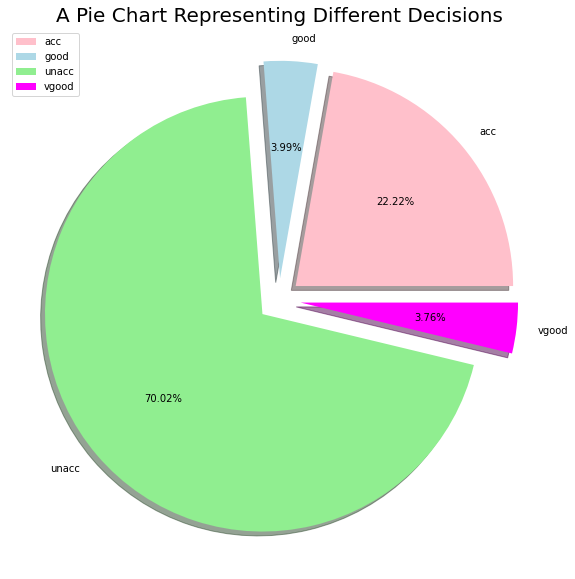

In [15]:
labels = ['acc', 'good', 'unacc', 'vgood']
colors = ['pink', 'lightblue', 'lightgreen', 'magenta']
size = [384, 69, 1210, 65]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Different Decisions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [16]:
# Label Encoding

CarEval.CAR.replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)

CarEval['CAR'].value_counts()

0    1210
1     384
2      69
3      65
Name: CAR, dtype: int64

In [17]:
CarEval['lug_boot'].value_counts().sort_index()


big      576
med      576
small    576
Name: lug_boot, dtype: int64

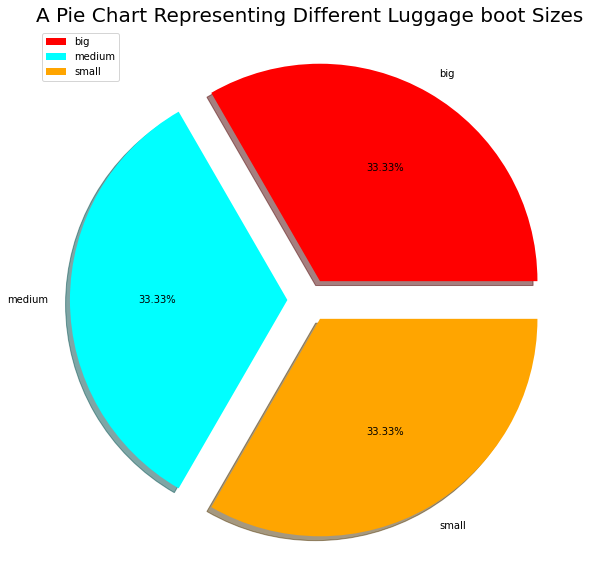

In [18]:
labels = ['big', 'medium', 'small',]
colors = ['red', 'cyan', 'orange']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Luggage boot Sizes', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [19]:
# label Encoding
CarEval['lug_boot'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
CarEval['lug_boot'].value_counts()

2    576
1    576
0    576
Name: lug_boot, dtype: int64

In [20]:
CarEval['safety'].value_counts().sort_index()


high    576
low     576
med     576
Name: safety, dtype: int64

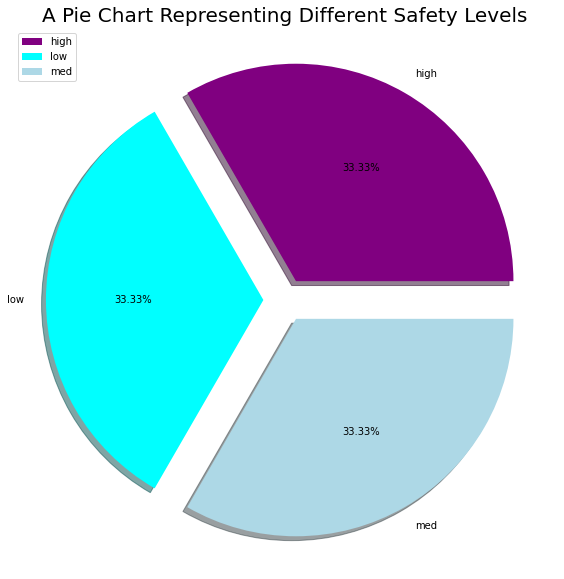

In [21]:
labels = ['high', 'low', 'med']
colors = ['purple', 'cyan', 'lightblue']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Safety Levels', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [22]:
# label Encoding

CarEval['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)

CarEval['safety'].value_counts()

2    576
1    576
0    576
Name: safety, dtype: int64

In [23]:
CarEval['buying'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    432
Name: buying, dtype: int64

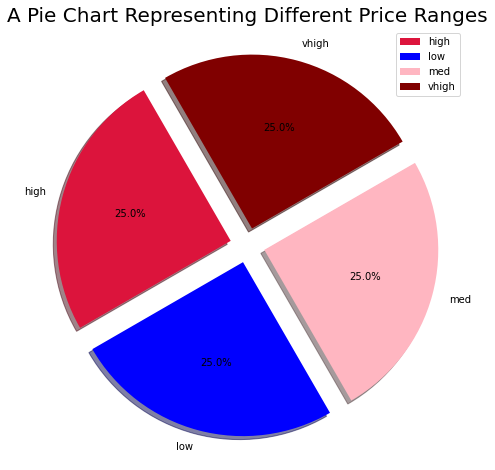

In [24]:
labels = ['high', 'low', 'med', 'vhigh']
colors = ['crimson', 'blue', 'lightpink', 'maroon']
size = [432, 432, 432, 432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 120, autopct = '%1.1f%%')
plt.title('A Pie Chart Representing Different Price Ranges', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [25]:
# label Encoding
CarEval['buying'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
CarEval['buying'].value_counts()

3    432
2    432
1    432
0    432
Name: buying, dtype: int64

In [26]:
CarEval['maint'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    432
Name: maint, dtype: int64

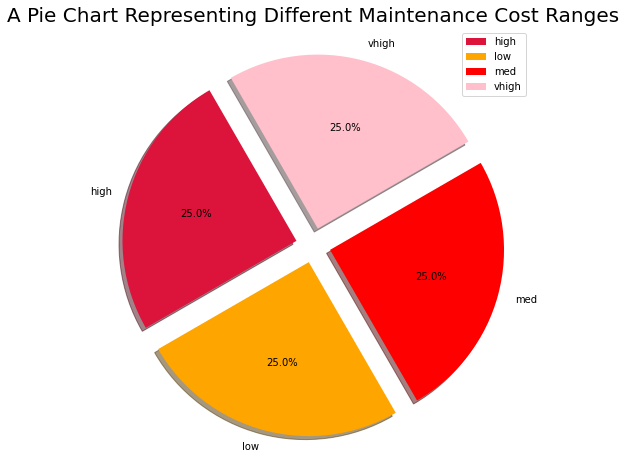

In [28]:
labels = ['high', 'low', 'med', 'vhigh']
colors = ['crimson', 'orange', 'red', 'pink']
size = [432, 432, 432, 432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('A Pie Chart Representing Different Maintenance Cost Ranges', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [29]:
# label Encoding

CarEval['maint'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)

CarEval['maint'].value_counts()

3    432
2    432
1    432
0    432
Name: maint, dtype: int64

In [30]:
CarEval['doors'].value_counts().sort_index()


2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

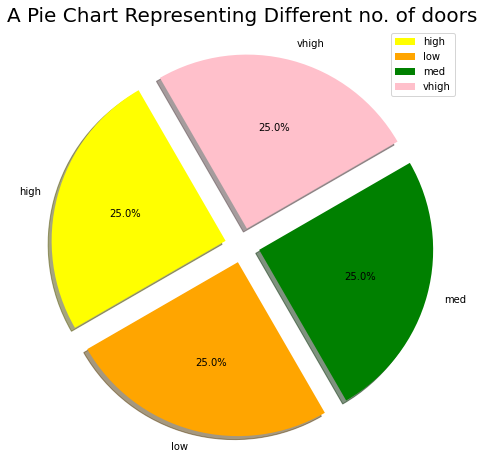

In [31]:
labels = ['high', 'low', 'med', 'vhigh']
colors = ['yellow', 'orange', 'green', 'pink']
size = [432, 432, 432, 432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('A Pie Chart Representing Different no. of doors', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [32]:
# label Encoding
CarEval['doors'].replace('5more', 5, inplace = True)
CarEval['doors'].value_counts()

4    432
2    432
3    432
5    432
Name: doors, dtype: int64

In [33]:
CarEval['persons'].value_counts().sort_index()

2       576
4       576
more    576
Name: persons, dtype: int64

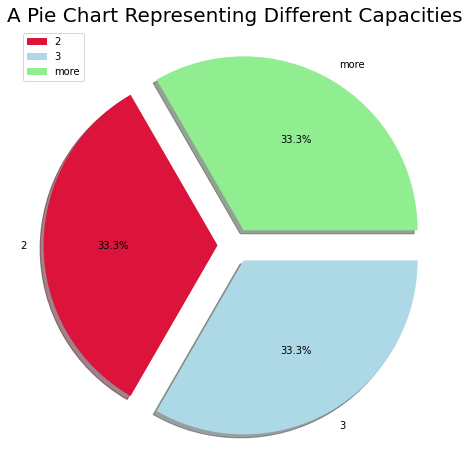

In [34]:
labels = ['2', '3', 'more']
colors = ['crimson', 'lightblue', 'lightgreen']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('A Pie Chart Representing Different Capacities', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [35]:
# label Encoding

CarEval['persons'].replace('more', 5, inplace = True)

CarEval['persons'].value_counts()

4    576
2    576
5    576
Name: persons, dtype: int64

In [36]:
CarEval.sample(5)

,buying,maint,doors,persons,lug_boot,safety,CAR
1129,0,0,3,4,2,1,2
221,2,3,2,4,2,1,0
1706,3,0,4,4,1,0,0
538,3,1,5,2,0,2,0
808,1,1,3,5,2,1,1


**Data Preprocessing**

In [37]:
CarEval.shape

(1728, 7)

In [38]:
# splitting the dataset into dependent and independent variables

x = CarEval.iloc[:,:6]
y = CarEval.iloc[:, 6]

print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1728, 6)
Shape of y:  (1728,)


In [39]:
# Label Encoding once more so that we get higher accuracy
# we have 4 classes namely 0, 1, 2, 3
# It would be very beneficial if we combine 0 and 1 as 0 and 1 and 2 as 1

# CarEval.CAR.replace((0, 1, 2, 3), (0, 0, 1, 1), inplace = True)

CarEval['CAR'].value_counts()

0    1210
1     384
2      69
3      65
Name: CAR, dtype: int64

In [40]:
# splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

Shape of x_train:  (1209, 6)
Shape of y_train:  (1209,)
shape of x_test:  (519, 6)
shape of y_test:  (519,)


In [41]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Modelling**

**Decision Trees with max_depth = 3**



In [42]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 3)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.8163771712158809
Testing Accuracy:  0.7803468208092486
[[325  51   0   0]
 [ 25  80   0   0]
 [  0  17   0   0]
 [  0  21   0   0]]


**Decision Tree with max_depth = 2**

In [43]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 2)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.782464846980976
Testing Accuracy:  0.766859344894027
[[293  83   0   0]
 [  0 105   0   0]
 [  0  17   0   0]
 [  0  21   0   0]]


**Decision Tree with max_depth = 4**

In [44]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 4)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.8411910669975186
Testing Accuracy:  0.815028901734104
[[318  58   0   0]
 [  0 105   0   0]
 [  0  17   0   0]
 [  0  21   0   0]]


In [45]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 5)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.8660049627791563
Testing Accuracy:  0.8574181117533719
[[345  30   0   1]
 [ 13  79   0  13]
 [  0  10   0   7]
 [  0   0   0  21]]


In [46]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 6)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9065343258891646
Testing Accuracy:  0.8786127167630058
[[341  34   0   1]
 [  0  93   7   5]
 [  0   4   6   7]
 [  0   5   0  16]]


In [47]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 7)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9429280397022333
Testing Accuracy:  0.9325626204238922
[[360  15   1   0]
 [  4  90   5   6]
 [  0   4  13   0]
 [  0   0   0  21]]


In [48]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 8)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9553349875930521
Testing Accuracy:  0.9383429672447013
[[361  15   0   0]
 [  3  95   4   3]
 [  1   6  10   0]
 [  0   0   0  21]]


In [49]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 9)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9793217535153019
Testing Accuracy:  0.9595375722543352
[[373   3   0   0]
 [  8  92   3   2]
 [  0   3  14   0]
 [  0   0   2  19]]


In [50]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 10)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9875930521091811
Testing Accuracy:  0.9633911368015414
[[372   4   0   0]
 [  6  96   2   1]
 [  0   4  13   0]
 [  0   0   2  19]]


In [51]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 11)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



Training Accuracy:  0.9958643507030603
Testing Accuracy:  0.9749518304431599
[[374   2   0   0]
 [  5  98   1   1]
 [  0   2  15   0]
 [  0   0   2  19]]


In [60]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_recall_fscore_support(y_test, y_pred, average='micro')
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9730662981114053, 0.9730250481695568, 0.9729084824130442, None)

In [52]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 12)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9966914805624483
Testing Accuracy:  0.9730250481695568
[[374   2   0   0]
 [  6  97   1   1]
 [  0   2  15   0]
 [  0   0   2  19]]


In [53]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 13)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  1.0
Testing Accuracy:  0.9749518304431599
[[374   2   0   0]
 [  5  98   1   1]
 [  0   2  15   0]
 [  0   0   2  19]]


In [54]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 14)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  1.0
Testing Accuracy:  0.9710982658959537
[[374   2   0   0]
 [  7  96   1   1]
 [  0   2  15   0]
 [  0   0   2  19]]


In [55]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 15)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  1.0
Testing Accuracy:  0.9730250481695568
[[374   2   0   0]
 [  6  97   1   1]
 [  0   2  15   0]
 [  0   0   2  19]]


using default value of max_depth We are getting the best result of 98.07% accuracy over the test set



In [56]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# creating a model
model = DecisionTreeClassifier()
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report of DT on Training Dataset - \n", classification_report(y_test,y_pred))

Training Accuracy:  1.0
Testing Accuracy:  0.9730250481695568

Confusion Matrix of DT on Training Dataset - 
 [[374   2   0   0]
 [  6  97   1   1]
 [  0   2  15   0]
 [  0   0   2  19]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       376
           1       0.96      0.92      0.94       105
           2       0.83      0.88      0.86        17
           3       0.95      0.90      0.93        21

    accuracy                           0.97       519
   macro avg       0.93      0.93      0.93       519
weighted avg       0.97      0.97      0.97       519



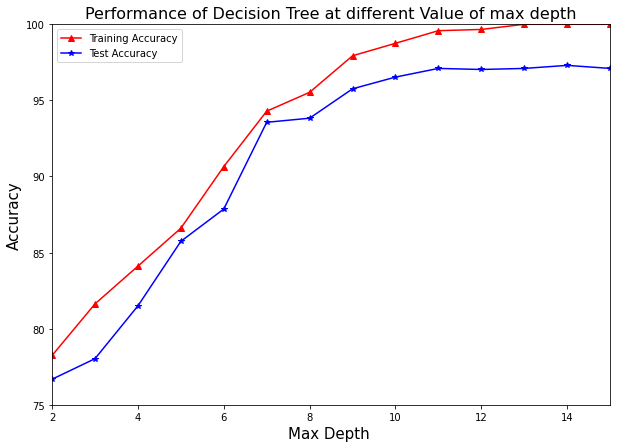

In [57]:
#  plotting the graph for performance of decision trees with different max_depth values

max_depth = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
Training_Accuracy = np.array([78.24, 81.63, 84.11, 86.6, 90.65, 94.29, 95.53, 97.93, 98.75, 99.58, 99.66, 100, 100, 100])
Testing_Accuracy = np.array([76.68, 78.03, 81.5, 85.74,87.86, 93.56, 93.83, 95.76, 96.53, 97.1, 97.03, 97.1, 97.3, 97.1])

plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(max_depth, Training_Accuracy, 'r-^', label="Training Accuracy")
plt.plot(max_depth, Testing_Accuracy, 'b-*', label = "Test Accuracy")
plt.title('Performance of Decision Tree at different Value of max depth', fontsize = 16)
plt.xlim([2, 15])
plt.ylim([75, 100])
plt.xlabel('Max Depth ', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()

plt.show()

Text(0.5, 1.0, 'Confusion Matrix of Test Dataset')

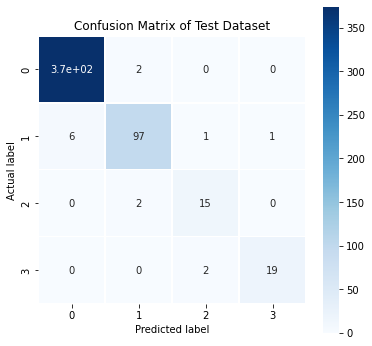

In [58]:
plt.figure(figsize=(6,6))
sns.heatmap(data=confusion_matrix(y_test,y_pred),linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of Test Dataset')

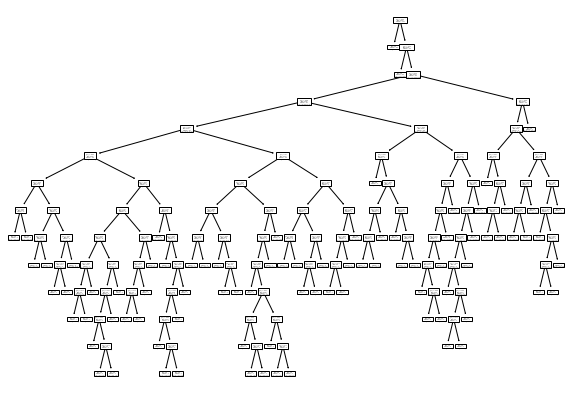

In [59]:
# Once trained, you can plot the tree with the plot_tree function:
tree.plot_tree(model) 
plt.savefig('out.pdf')